In [96]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler

In [97]:
# Importing the dataset and printing all of its features
data = pd.read_csv('data.csv')
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [98]:
print(data['Unnamed: 32']) # we will be dropping this column since it is empty


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64


In [99]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True) # dropping the empty column and the id column

In [100]:
print(data.columns) # printing the columns to confirm that the columns has been dropped

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [101]:
# Splitting the dataset into features (X) and target (Y)

X = data.drop('diagnosis', axis=1)
Y = data['diagnosis']

<Axes: >

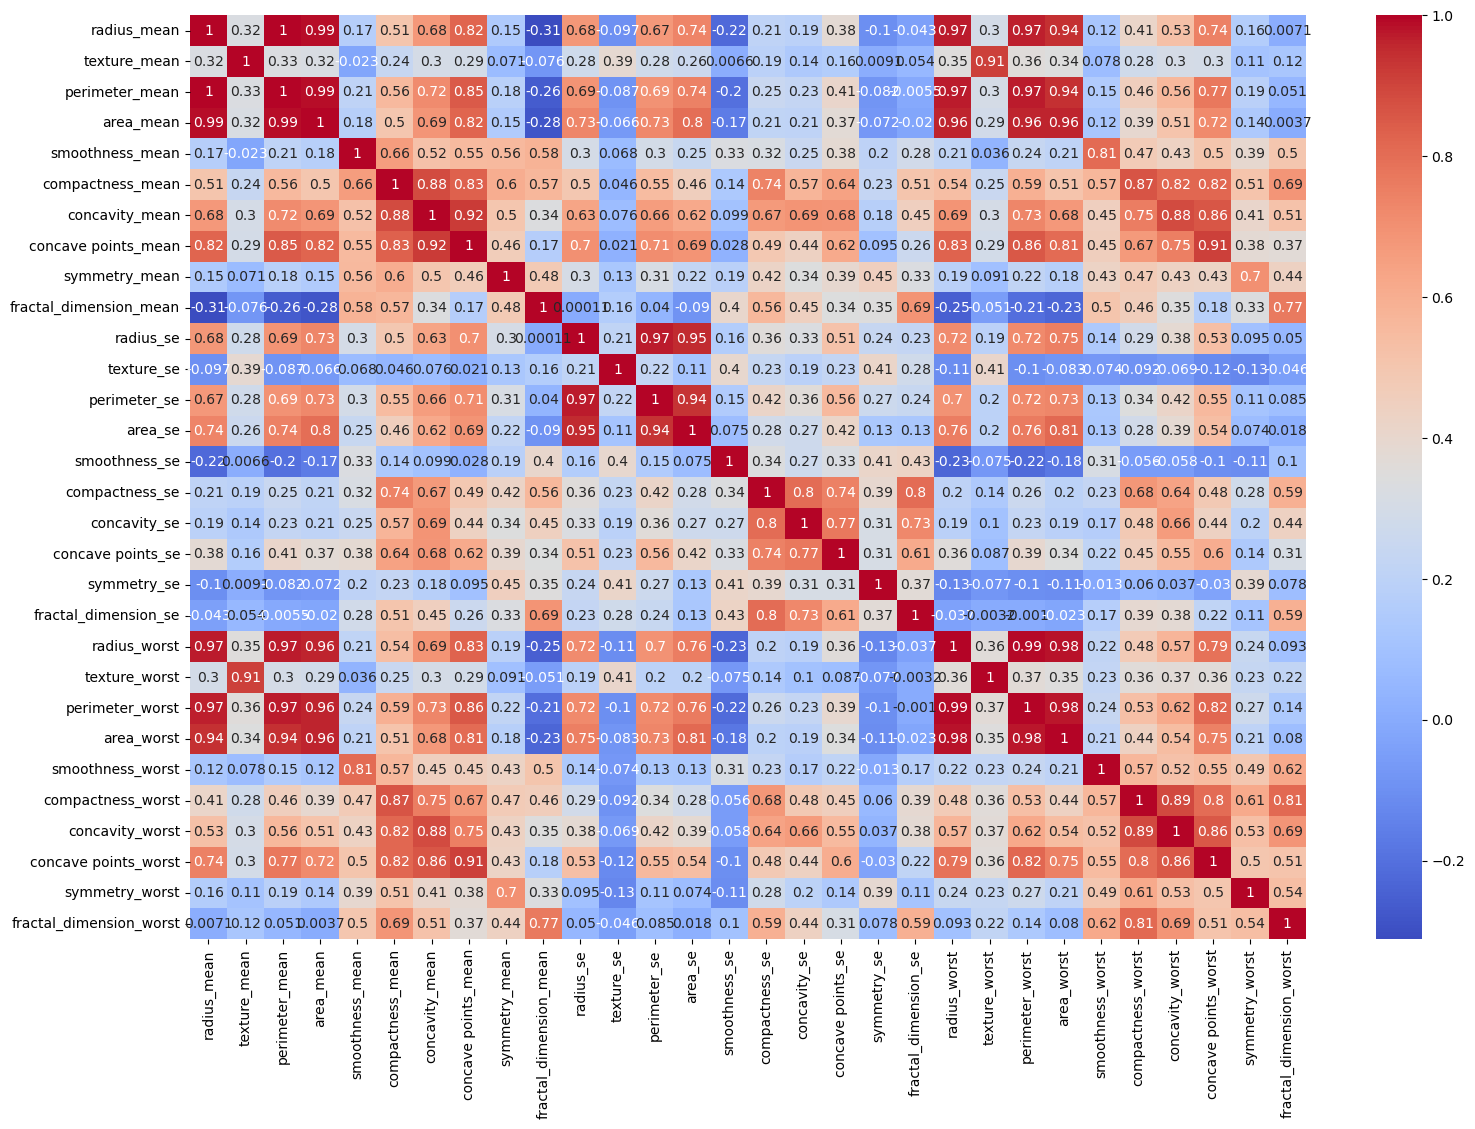

In [102]:
fig, ax = plt.subplots(figsize=(18, 12))
correlation = X.corr()
sns.heatmap(correlation, annot=True, ax=ax, cmap='coolwarm')

In [103]:
# We remove the following columns :
X.drop(['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'area_mean', 'area_se', 'area_worst'], axis=1, inplace=True) 

<Axes: >

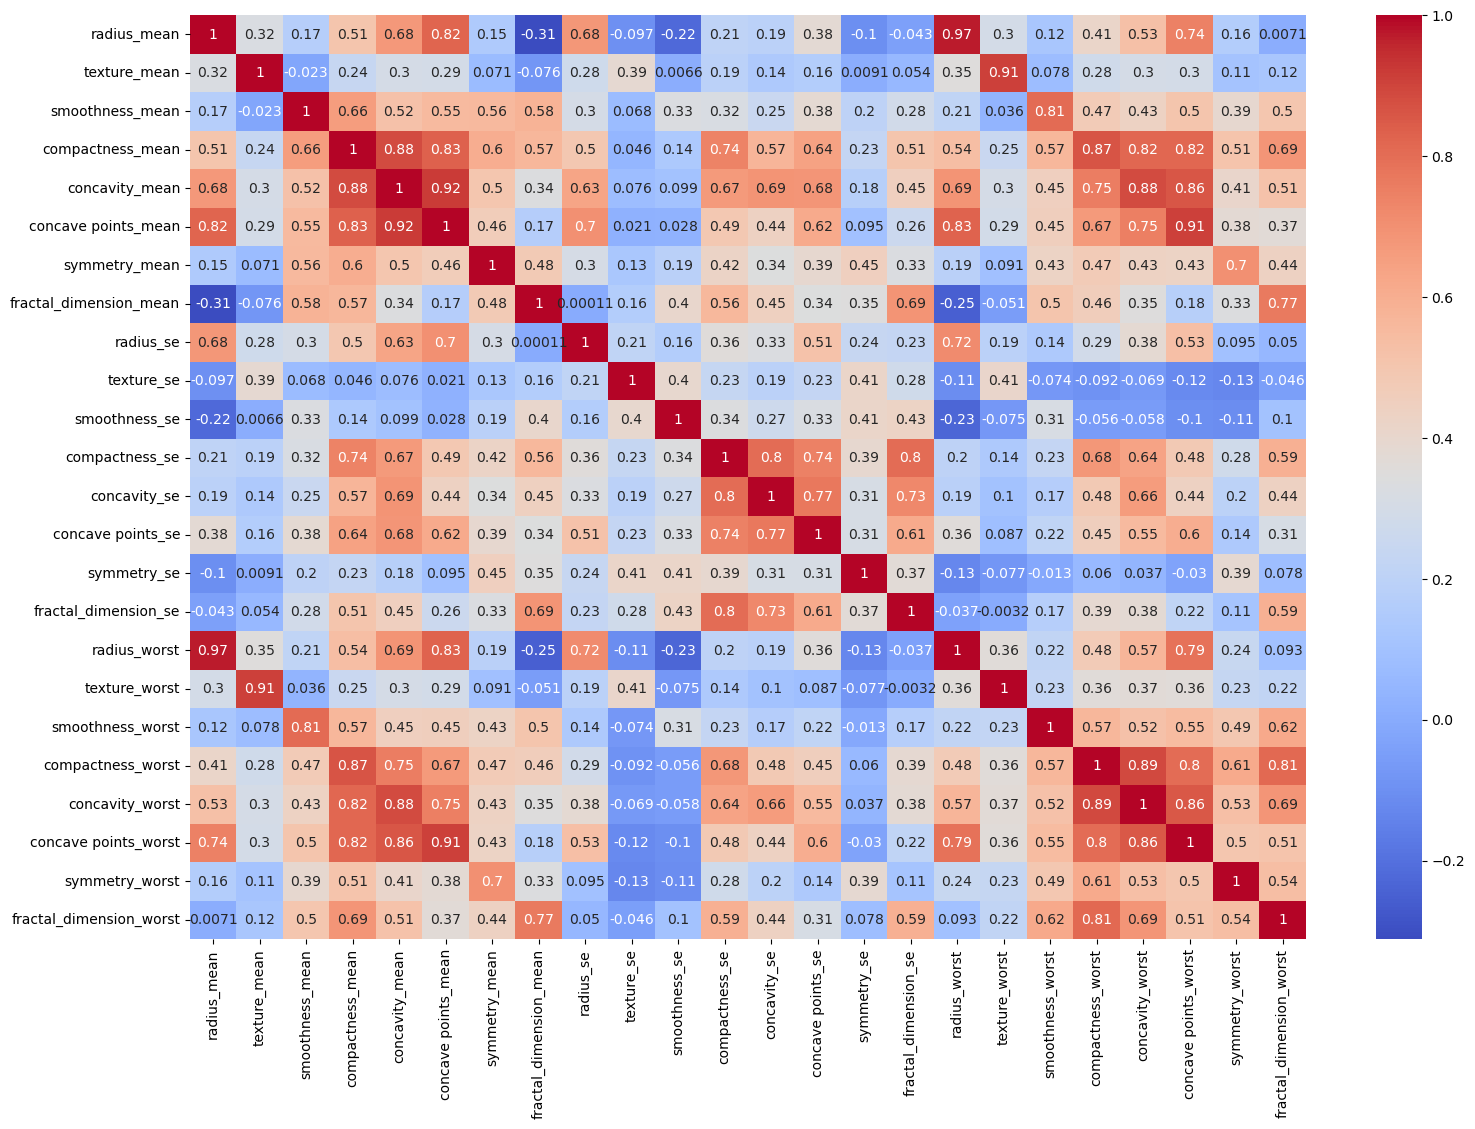

In [104]:
# Testing correlation again :
fig, ax = plt.subplots(figsize=(18, 12))
correlation = X.corr()
sns.heatmap(correlation, annot=True, ax=ax, cmap='coolwarm')

In [105]:
# Splitting the data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Applying Standar Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Applying Robust Scaler
# from sklearn.preprocessing import RobustScaler
# X_train = RobustScaler().fit_transform(X_train)
# X_test = RobustScaler().fit_transform(X_test)

In [106]:
import numpy as np

# Check for NaN values in X_train
nan_columns_X_train = np.isnan(X_train).any(axis=0)
print("NaN columns in X_train:", np.where(nan_columns_X_train)[0].tolist())

# Check for NaN values in X_test
nan_columns_X_test = np.isnan(X_test).any(axis=0)
print("NaN columns in X_test:", np.where(nan_columns_X_test)[0].tolist())

NaN columns in X_train: []
NaN columns in X_test: []


We don't have any Nan values - i just wanted to verify this.

In [107]:
# Define the SVM model with GridSearchCV for hyperparameter tuning

parameter_grid = [
    {'kernel': ['linear'], 'C': [0.1]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'coef0': [0, 0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 'scale','auto']}
]

grid_search = GridSearchCV(SVC(), parameter_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters found by grid search:", grid_search.best_params_)

# Predict on the test set
Y_pred = grid_search.predict(X_test)


Best parameters found by grid search: {'C': 1, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}


In [108]:
# print the number of the malignant cases by predict and the actual value from the testing
print("Number of malignant cases by predict:", np.sum(Y_pred == 'M'))
print("Number of malignant cases in the test set:", np.sum(Y_test == 'M'))


Number of malignant cases by predict: 45
Number of malignant cases in the test set: 47


In [109]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred, labels=['M', 'B'])  # Explicitly state the order of labels if needed
f1 = f1_score(Y_test, Y_pred, pos_label='M')
precision = precision_score(Y_test, Y_pred, pos_label='M')
recall = recall_score(Y_test, Y_pred, pos_label='M')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[45  2]
 [ 0 67]]
F1 Score: 0.9782608695652174
Precision: 1.0
Recall: 0.9574468085106383


<Axes: >

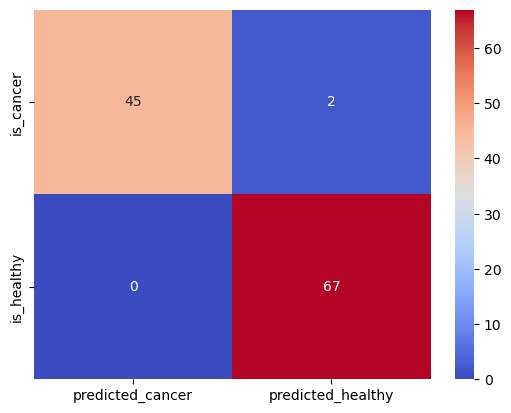

In [110]:
confusion = pd.DataFrame(conf_matrix, index=['is_cancer', 'is_healthy'], columns=['predicted_cancer', 'predicted_healthy'])
sns.heatmap(confusion, annot=True, cmap='coolwarm', fmt='d')